Classes: ['defective', 'good']

Image Counts per Class: {'defective': 1028, 'good': 828}


C:\Users\iqra khan\AppData\Local\Temp\ipykernel_21996\1724281586.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")


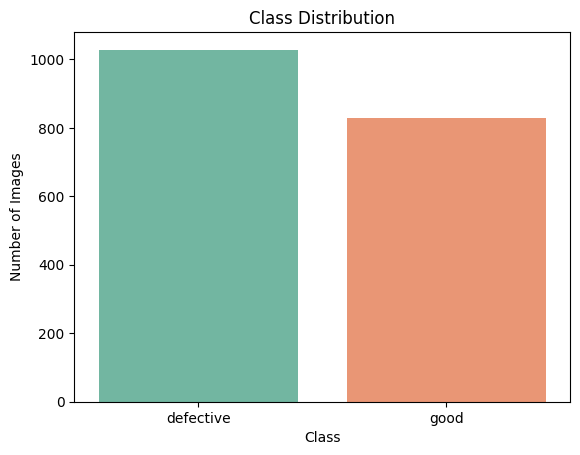

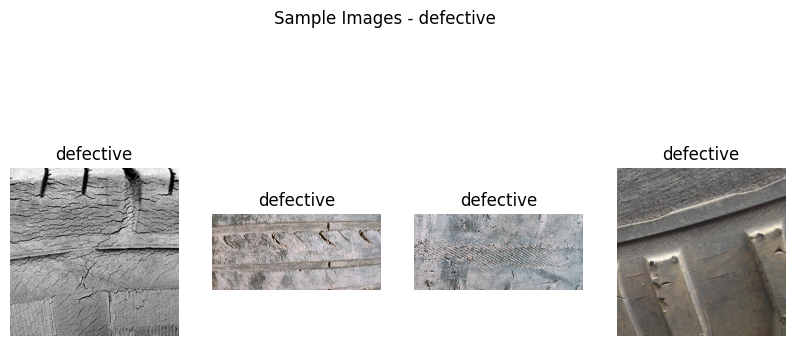

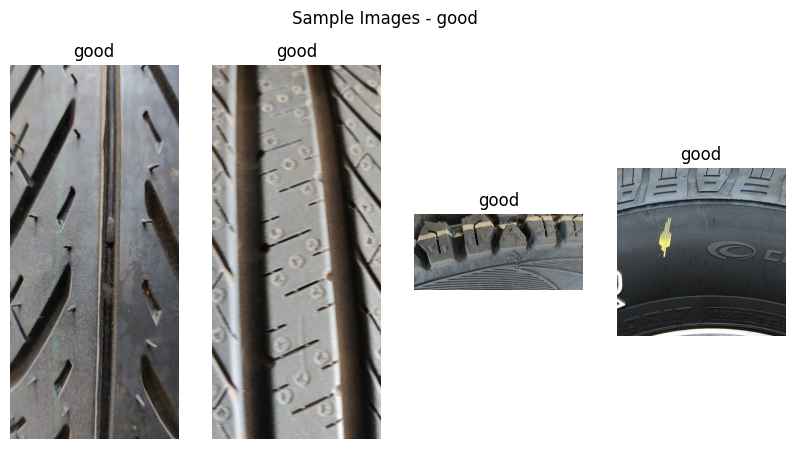

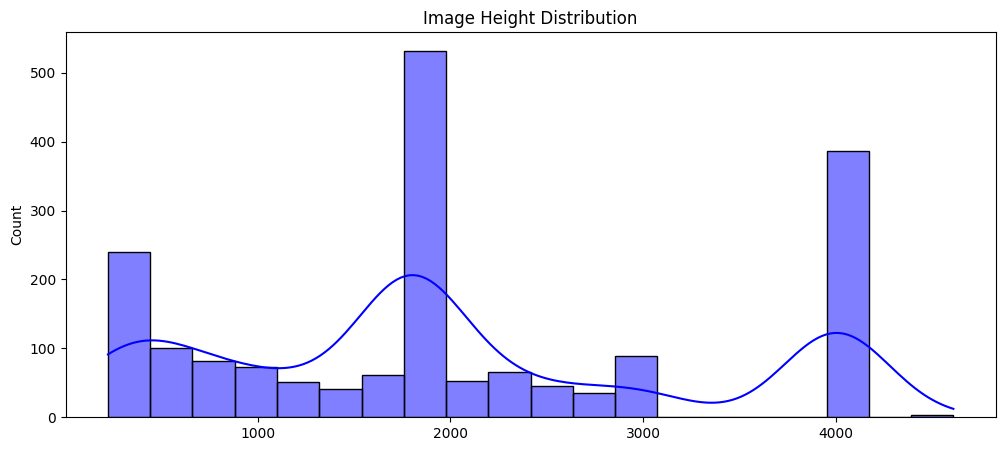

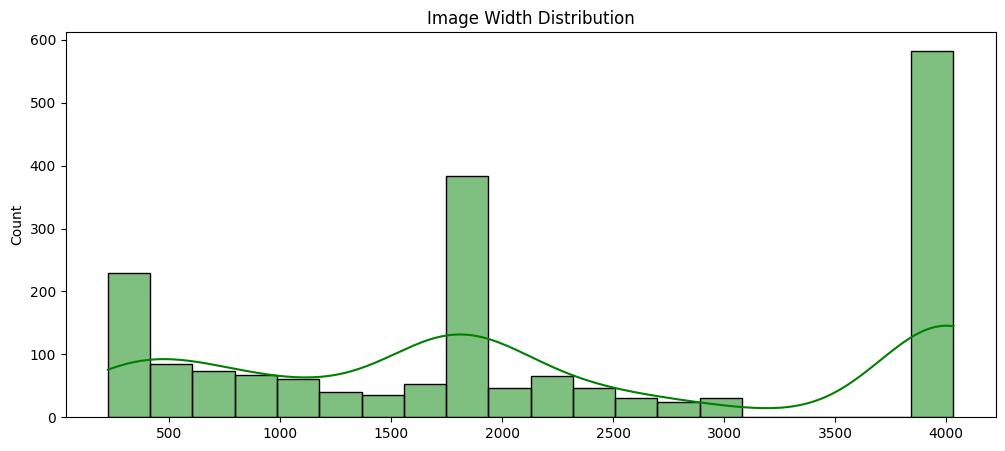

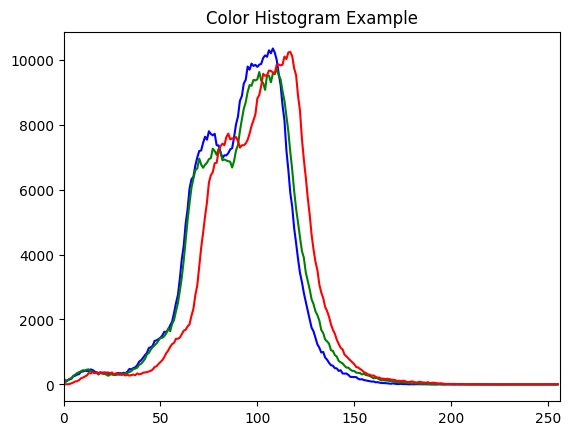


✅ Image EDA Completed.


In [1]:
# tyre_classification_image_eda.py

import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from glob import glob

# ---- 1. Dataset Path ----
DATA_DIR = "tyre_img"  # update if needed

# ---- 2. Count Images per Class ----
classes = os.listdir(DATA_DIR)
print("Classes:", classes)

class_counts = {}
for cls in classes:
    class_path = os.path.join(DATA_DIR, cls)
    class_counts[cls] = len(os.listdir(class_path))

print("\nImage Counts per Class:", class_counts)

# Plot class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# ---- 3. Show Random Sample Images ----
for cls in classes:
    class_path = os.path.join(DATA_DIR, cls)
    sample_imgs = random.sample(os.listdir(class_path), 4)

    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(sample_imgs):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls)
    plt.suptitle(f"Sample Images - {cls}")
    plt.show()

# ---- 4. Image Size Distribution ----
img_shapes = []
for cls in classes:
    class_path = os.path.join(DATA_DIR, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_shapes.append(img.shape[:2])  # (height, width)

heights, widths = zip(*img_shapes)

plt.figure(figsize=(12, 5))
sns.histplot(heights, bins=20, kde=True, color="blue")
plt.title("Image Height Distribution")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(widths, bins=20, kde=True, color="green")
plt.title("Image Width Distribution")
plt.show()

# ---- 5. Color Histogram Example ----
sample_img_path = glob(os.path.join(DATA_DIR, classes[0], "*"))[0]
img = cv2.imread(sample_img_path)
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.title("Color Histogram Example")
plt.show()

print("\n✅ Image EDA Completed.")
